In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline


In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

<Axes: xlabel='casual', ylabel='Count'>

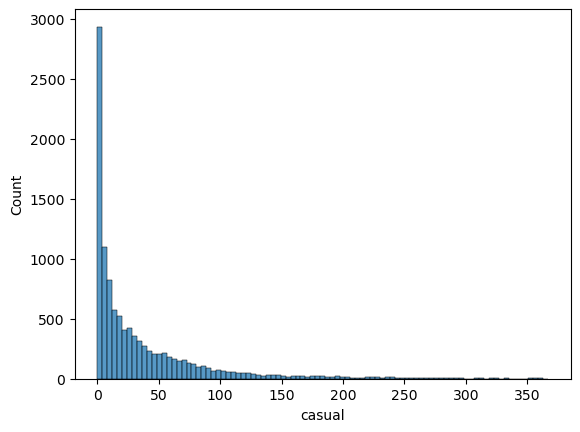

In [3]:
sns.histplot(bikes.casual)

In [4]:
bikes.casual.describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [5]:
def casual_category(x):
    if x >= 0 and x <= 4:
        return 0
    elif x > 4 and x <= 17:
        return 1
    elif x >17 and x <= 49:
        return 2
    elif x > 49:
        return 3

In [6]:
bikes['casual_cat'] = bikes['casual'].apply(casual_category)

In [7]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,casual_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [8]:
x = np.array(bikes[['temp','humidity']])
y = np.array(bikes['casual_cat'])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

In [12]:
# Use n=100 as we have multiple target values to predict 
# Since the prediction of a record is always based on the majority target label voting of the n nearest neighbours to the training record
# the n nearest neighbour set needs to be large enough to produce meaningful and robust result when there are multiple target label values
# Also, the 'nearest' is defined through the selected distance metric like Hamming or Euclidean distance 
 
knn = KNeighborsClassifier(n_neighbors=100)


In [13]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [14]:
y_pred = knn.predict(x_test)

In [15]:
print(accuracy_score(y_pred, y_test))

0.48438934802571165


In [16]:
import warnings
warnings.filterwarnings("ignore")

#### Use grid search only when the training set is small or the # of hyper-parameter to tune is acceptable to avoid high computation cost & time 

In [17]:
# params knn
params_knn = {'n_neighbors': list(range(1,500)), 
              'weights': ['uniform', 'distance'], 
              'metric': ['l1', 'euclidean', 'manhattan', 'sokalsneath', 'hamming', 'sokalmichener', 'rogerstanimoto', 'braycurtis', 'dice', 'jaccard', 'pyfunc', 'haversine', 'matching', 'cityblock', 'correlation', 'l2', 'nan_euclidean', 'chebyshev', 'p', 'wminkowski', 'minkowski', 'cosine', 'infinity', 'russellrao', 'seuclidean', 'canberra', 'kulsinski', 'sqeuclidean', 'yule', 'mahalanobis'] }
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter=100, scoring='accuracy')
#gridsearch_knn = GridSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

#gridsearch_knn.fit(x_train, y_train)
randomsearch_knn.fit(x_train, y_train)

#print("Best parameters from GridSearc: ", gridsearch_knn.best_params_)
print("Best parameters from RandomSearch: ", randomsearch_knn.best_params_)

Best parameters from RandomSearch:  {'weights': 'uniform', 'n_neighbors': 212, 'metric': 'cityblock'}


In [20]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
cv_scores_knn = cross_val_score(knn_best, x_train, y_train, cv=5, scoring='accuracy')
knn_best.fit(x_train, y_train)
y_pred_knn = knn_best.predict(x_test)


In [21]:
print(cv_scores_knn)
print("\nK-Nearest Neighbors Metrics: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))


[0.50057405 0.52927669 0.50746269 0.48592763 0.49741528]

K-Nearest Neighbors Metrics: 
Accuracy:  0.4898989898989899
